<a href="https://colab.research.google.com/github/xmpuspus/Lectures/blob/master/notebooks/HousingDataRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Median Value of Houses

In [0]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.linear_model import LinearRegression # linear regression package

# linear regression for killing useless features
from sklearn.linear_model import Lasso

# prevents overfitting
from sklearn.linear_model import Ridge

# prevents overfitting and kills useless features
from sklearn.linear_model import ElasticNet

# MSE
from sklearn.metrics import mean_squared_error as mse

In [0]:
# read data
data = pd.read_csv("sample_data/california_housing_train.csv")

In [0]:
data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


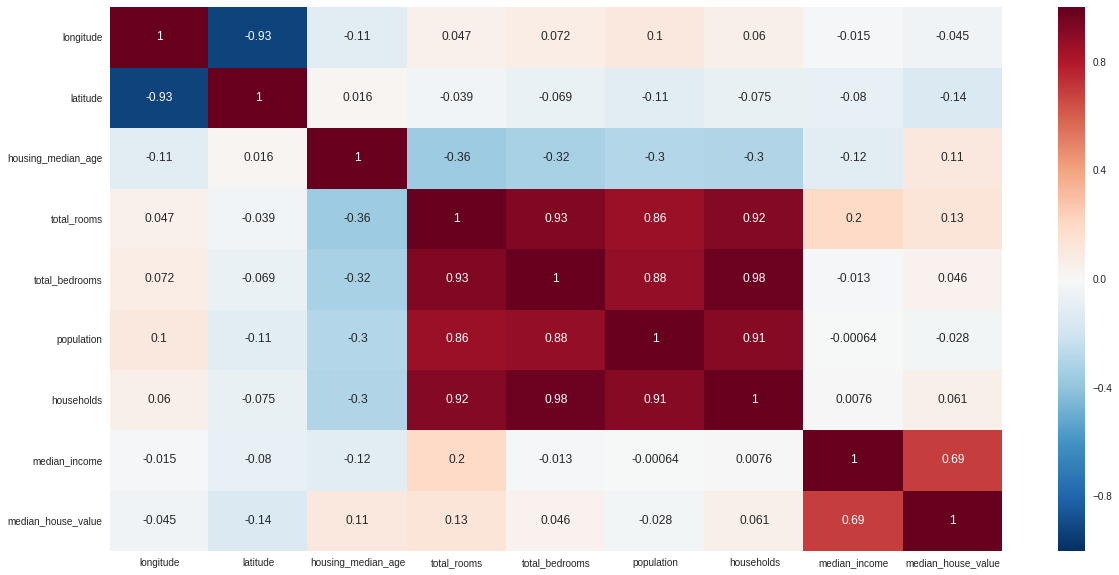

In [0]:
sns.heatmap(data.corr(), annot = True)

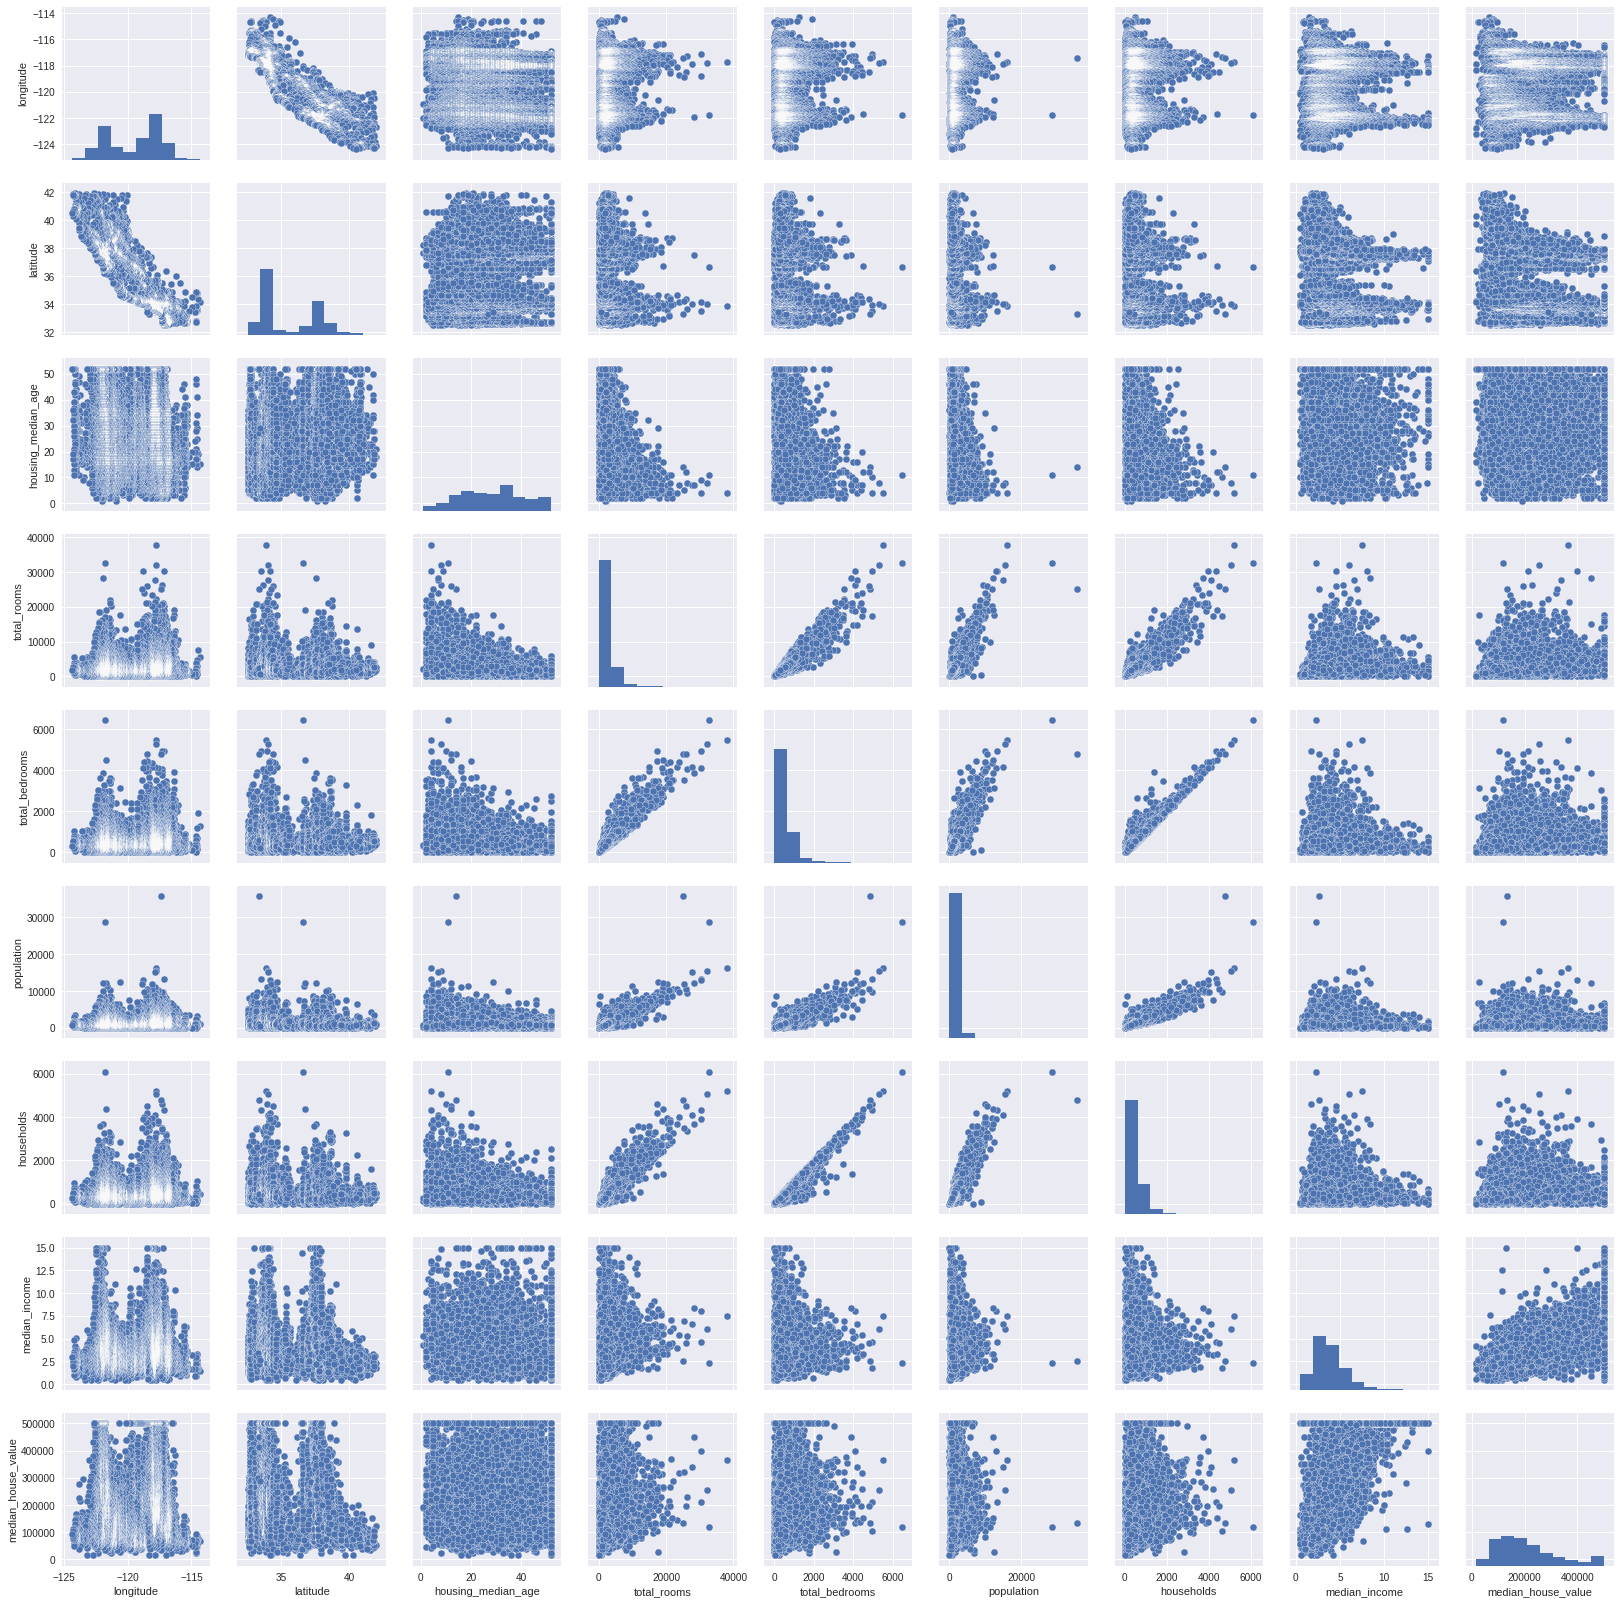

In [0]:
sns.pairplot(data)

In [0]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [0]:
features = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

X = data[features]

In [0]:
y = data['median_house_value']

# Lasso

In [0]:
lasso_model = Lasso()

lasso_model.fit(X, y)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
lasso_model.score(X, y)

0.5713482747962273

In [0]:
lasso_model.coef_

array([ 1.88000442e+03, -1.99553571e+01,  9.95212712e+01, -3.50184928e+01,
        1.27226761e+02,  4.80330387e+04])

# Ridge

In [0]:
ridge_model = Ridge()
ridge_model.fit(X, y)
ridge_model.score(X, y)

0.5713482745814056

In [0]:
ridge_model.coef_

array([ 1.88000654e+03, -1.99543133e+01,  9.95151785e+01, -3.50189808e+01,
        1.27229255e+02,  4.80322837e+04])

# Elastic Net

In [0]:
elastic_net = ElasticNet()
elastic_net.fit(X, y)
elastic_net.score(X, y)

0.5591187470314198

# Linear Regression

In [0]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.5713482748283873

# Predictive Analytics 
Test on unseen data

In [0]:
# data we havent seen
data_test = pd.read_csv("sample_data/california_housing_test.csv")

In [0]:
# Features of data we havent seen
X_test = data_test[features]

In [0]:
# Target of data we havent seen
y_test = data_test['median_house_value']

Lasso

In [0]:
y_pred_lasso = lasso_model.predict(X_test)

# error
mse(y_pred_lasso, y_test)

5808964096.664562

Ridge

In [0]:
y_pred_ridge = ridge_model.predict(X_test)
mse(y_pred_ridge, y_test)

5808960076.618068

Elastic

In [0]:
y_pred_elastic = elastic_net.predict(X_test)
mse(y_pred_elastic, y_test)

5916733328.354464

Linear Regression

In [0]:
y_pred_lr = lr.predict(X_test)
mse(y_pred_lr, y_test)

5808966246.7101965

# Train-Test Split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [0]:
data_train, data_test = train_test_split(data,test_size = .4)

In [0]:
data_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
15145,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0
4786,-118.09,34.10,27.0,6010.0,1532.0,3620.0,1445.0,2.7436,201700.0
16371,-122.53,37.93,37.0,1722.0,352.0,648.0,337.0,4.1250,310300.0
6605,-118.28,33.99,46.0,2577.0,703.0,2446.0,687.0,1.2750,98300.0
12113,-121.44,38.69,24.0,3124.0,556.0,1512.0,555.0,3.1942,94900.0
13516,-121.96,37.32,11.0,1711.0,493.0,1094.0,543.0,3.7300,227700.0
15207,-122.27,37.85,52.0,4076.0,920.0,1800.0,815.0,2.7054,182300.0
4219,-118.00,34.16,42.0,1020.0,156.0,398.0,157.0,6.1010,311800.0
9612,-119.42,36.35,20.0,1469.0,303.0,1031.0,259.0,1.6645,48000.0
10178,-119.85,36.78,8.0,3096.0,684.0,1454.0,545.0,2.7857,79700.0


In [0]:
data_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
8900,-118.83,34.18,23.0,5647.0,786.0,2050.0,738.0,6.3586,348300.0
2790,-117.71,34.03,11.0,3467.0,749.0,2163.0,676.0,3.4267,164400.0
8197,-118.44,34.25,33.0,1121.0,231.0,1038.0,236.0,4.8958,173700.0
9481,-119.28,37.11,34.0,1901.0,394.0,171.0,73.0,3.0729,144600.0
9138,-119.02,35.41,31.0,2348.0,701.0,1413.0,611.0,1.3222,51400.0
10116,-119.82,36.82,28.0,2268.0,336.0,752.0,330.0,5.2809,151500.0
3700,-117.93,34.09,35.0,782.0,153.0,499.0,163.0,4.2062,161300.0
3279,-117.86,33.62,17.0,2975.0,371.0,1247.0,398.0,10.1989,500001.0
14109,-122.06,37.37,18.0,3058.0,661.0,1377.0,675.0,6.1299,500001.0
11701,-121.30,38.03,13.0,1014.0,200.0,712.0,197.0,3.1471,102800.0
